#                                Hotel_Booking_Cancellation_Analysis_Python 

# Business Problem :  Hotel booking cancellatiions leads to less revennue.

# In recent years, City hotels and Resort hotels have seen high cancellation rates and facing issues such as -fewer revenues and less than ideal hotel room use. Consequently , lowering cancellation rates in both hotels' primary goal in order to increase their efficiencyin generating revenue, and for us to offer thorough business advise to address this problem.


# Assumptions :
    1)No unusual occurrences between 2015 and 2017 will have substantial impact on the data used.
    2)The information is still current and can be used to analyze a hotels's possible plans in an efficient manner.
    3)There are no unanticipated negatives to the hotel employing any advised technique.
    4)The hotels are not currently using any of the suggested solutions.
    5)The biggest factor affecting the effectiveness of earning income is booking cancellatons.
    6)Cancellations result in vacant rooms for the booked length of the time.
    7)Clients make hotel reservations the same year they make cancellations.

# Research Questions:
    
    1)What are the variables that affect hotel reservation cancellations?
    2)How can we make hotel reservations cancellations better?
    3)How will hotels be assisted in making pricing and promotional decisions?



# Hypothesis:
    1)More cancellations occur when the prices are higher.
    2)When there is longer waiting list, customers tend to cancel more frequently.
    3)The majority of clients are coming from offline travel agents to make their reservations.

# Imported the required liberaries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import datetime

# Loaded the data set form the saved file in desktop.

In [4]:
df = pd.read_csv(r"C:\Users\dhima\Downloads\hotel_bookings 2.csv", encoding='unicode-escape' )

# Exploratory Data Analysis and Data Cleaning 

In [41]:
df.shape

(119390, 32)

In [42]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Changed reservation_status_date coloumn to date time Dtype

In [5]:
df["reservation_status_date"]= pd.to_datetime(df['reservation_status_date'], format='mixed')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [48]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [49]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LK

In [50]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Deleted the company and agent column and droped missing values form country column

In [51]:
df.drop(['company', 'agent'],axis=1)
df.dropna(inplace=True)


In [52]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [53]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,...,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157,2016-03-10 04:18:48.110599168
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000,2015-02-12 00:00:00
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000,2015-11-15 00:00:00
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000,2015-11-15 00:00:00
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000,2016-07-16 00:00:00
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,...,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000,2017-12-03 00:00:00
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,...,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365,NaN


# Data Analysis and Visulatization 

In [54]:
cancelled_perc = df["is_canceled"].value_counts(normalize=True)
cancelled_perc

is_canceled
0    0.921659
1    0.078341
Name: proportion, dtype: float64

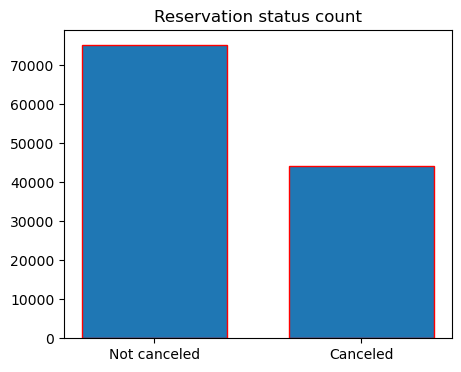

In [58]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(['Not canceled','Canceled'],df["is_canceled"].value_counts(),edgecolor='red',width=0.7)
plt.show()

# Above bar graph shows significant number of reservations that have not been canceled.Still 37% of clients canceled their reservation, which has significant impact on hotels' earnings.

<function matplotlib.pyplot.show(close=None, block=None)>

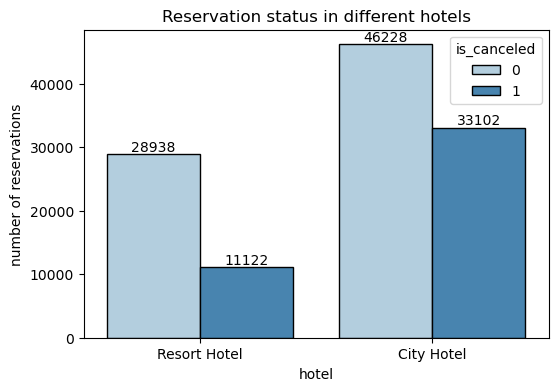

In [39]:
plt.figure(figsize=(6,4))
ax1=sns.countplot(x="hotel",hue="is_canceled",data=df,palette="Blues",edgecolor="black")
for container in ax1.containers:
    ax1.bar_label(container)

plt.xlabel("hotel")
plt.ylabel("number of reservations")
plt.title("Reservation status in different hotels")
plt.show

# Above plot graph shows - 0 represents hotel reservation not canceled and 1 represents hotel reservation canceled.
# In comparison to Resort hotels,City hotels have more bookings. Its possible Resort hotels are more expensive than those in cities.

In [59]:
resort_hotel=df[df["hotel"] =="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [60]:
city_hotel=df[df["hotel"] =="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [61]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()

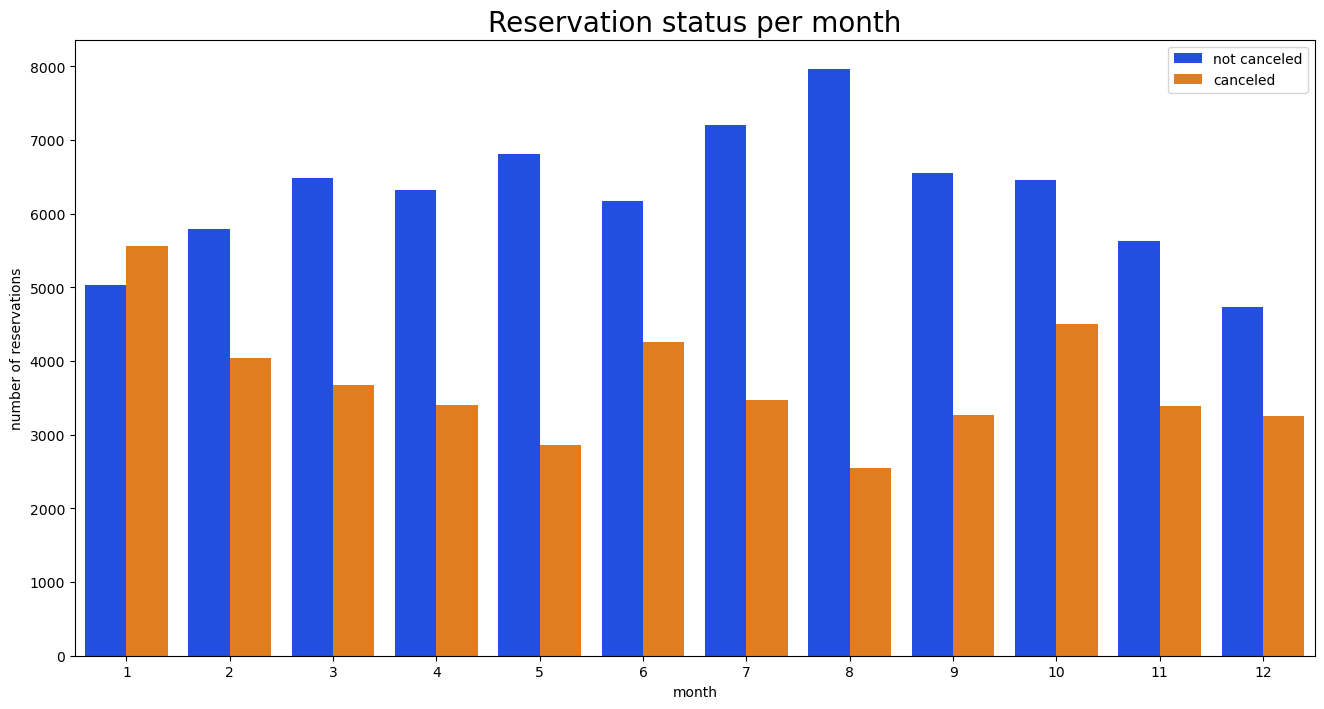

In [7]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x="month",hue="is_canceled",data=df,palette="bright")
plt.title("Reservation status per month",size=20)
plt.xlabel("month")
plt.ylabel("number of reservations")
plt.legend(["not canceled","canceled"])
plt.show()

# Above graph analysis shows - number of canceled reservations and not canceled reservations are largest in the month of August.Whereas January month has the most canceled reservations.

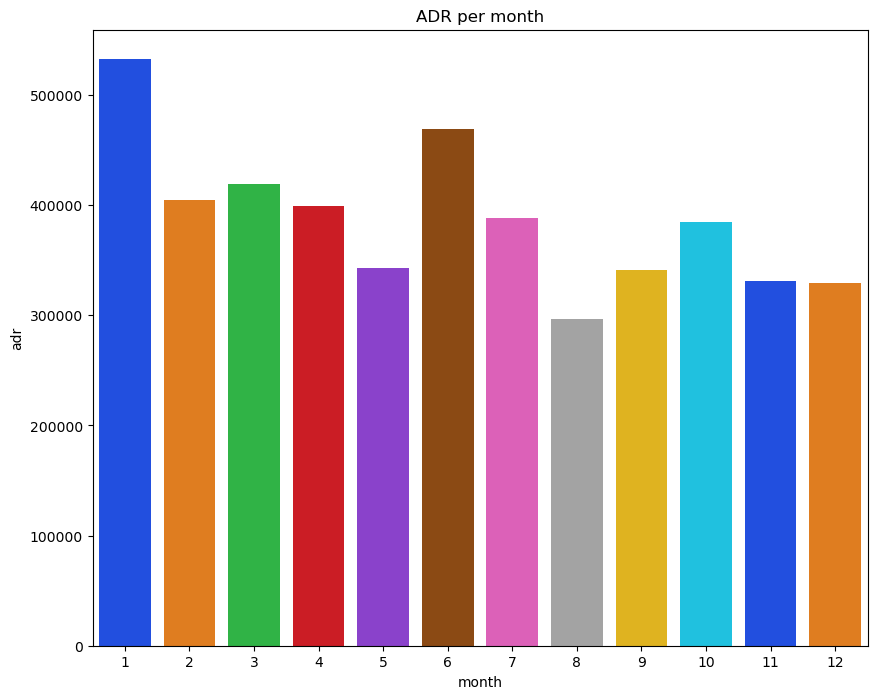

In [66]:

plt.figure(figsize=(10,8))
plt.title("ADR per month")
sns.barplot(x='month',y='adr',data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index(),palette="bright")

plt.show()

# Above bar graph demonstrates - cancellation are most common when prices are greatest and are least common when they are lowest.Therefore cost of the accomodation is solely responsible for the cancellation.

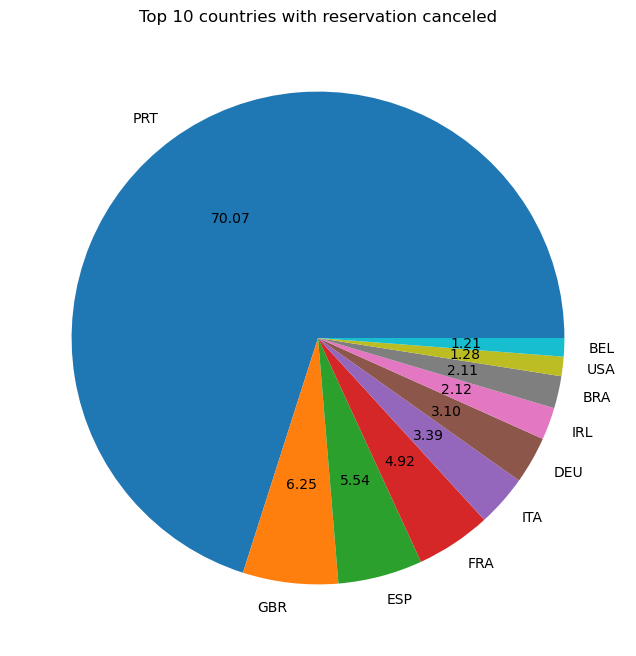

In [70]:
canceled_data=df[df["is_canceled"]==1]
top_10_countries=canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.title("Top 10 countries with reservation canceled")
plt.show()


# Above analysis shows - Protugal has the most reservation canceled booking among top 10 countires.

In [67]:
df["market_segment"].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [69]:
df["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [72]:
canceled_data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

# Above analysis shows - High cancellation percentage via online booking . Seems promises made by online agent or by hotels were not up to the mark or were false/unsatisfactory for the customers.

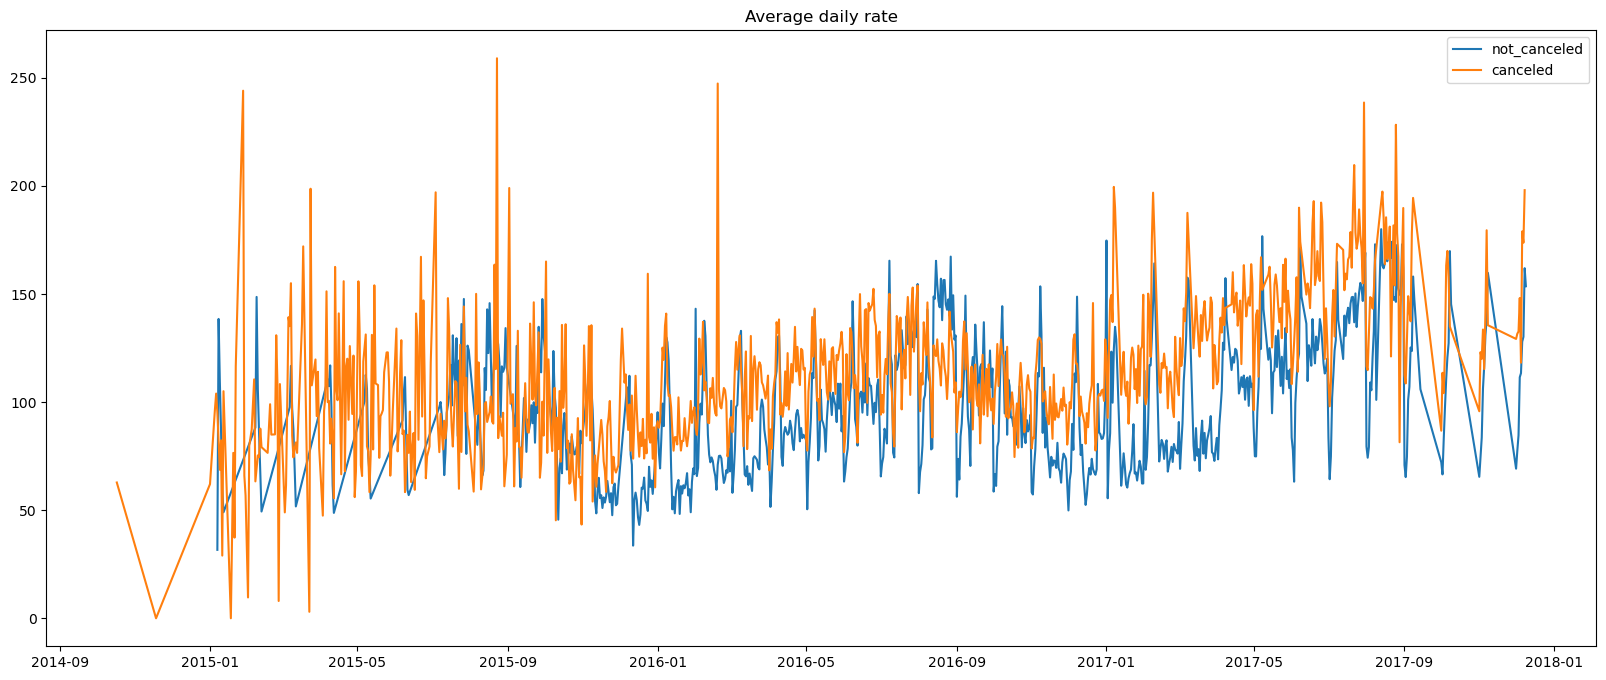

In [76]:
canceled_df_adr = canceled_data.groupby("reservation_status_date")[["adr"]].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values("reservation_status_date", inplace=True)

not_canceled_data=df[df["is_canceled"]==0]
not_canceled_df_adr = not_canceled_data.groupby("reservation_status_date")[["adr"]].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values("reservation_status_date", inplace=True)


plt.figure(figsize=(20,8))
plt.title("Average daily rate")
plt.plot(not_canceled_df_adr["reservation_status_date"],not_canceled_df_adr["adr"],label="not_canceled")
plt.plot(canceled_df_adr["reservation_status_date"],canceled_df_adr["adr"],label="canceled")
plt.legend()
plt.show()






In [85]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr["reservation_status_date"]>"2016") & (canceled_df_adr["reservation_status_date"]<"2017-09")]
not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr["reservation_status_date"]>"2016") & (not_canceled_df_adr["reservation_status_date"]<"2017-09")]

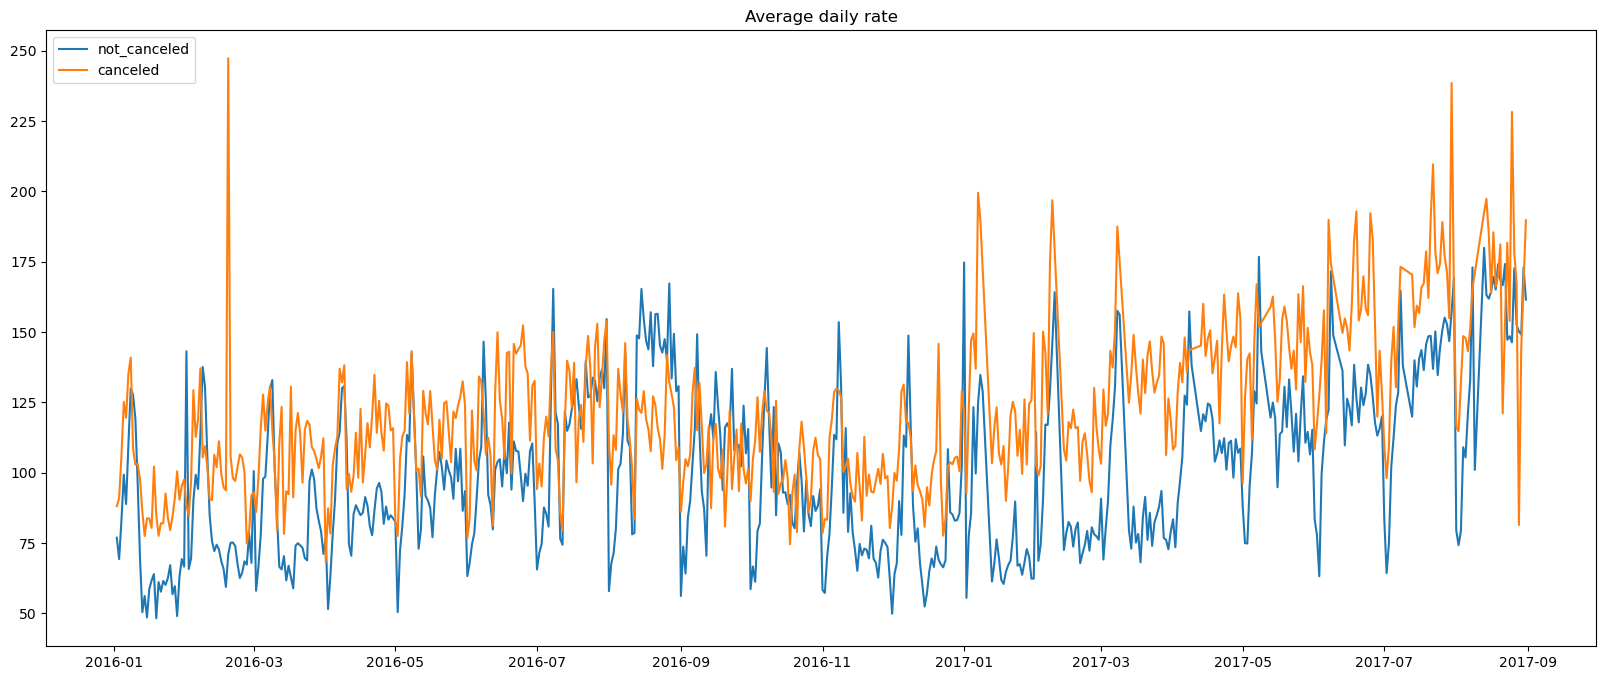

In [86]:
plt.figure(figsize=(20,8))
plt.title("Average daily rate")
plt.plot(not_canceled_df_adr["reservation_status_date"],not_canceled_df_adr["adr"],label="not_canceled")
plt.plot(canceled_df_adr["reservation_status_date"],canceled_df_adr["adr"],label="canceled")
plt.legend()
plt.show()

# Above analysis shows - reservation are canceled when the average daily rate is higher than when it not canceled.Hence higher price leads to higher cancellation.

# Suggestions:-


1)Cancellation rate raises as the price does. In order to prevent cancellations of the reservations, hotel could work on their pricing stratergies and try to lower the rates for specific hotels based on locations. They can also provide some discount to the customers.

2)As the ratio of the cancelletion and not cancellation of the resort hotel is higher in the resort hotel than the city hotels.So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.

3)In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.

4)They can also increase the quality of the hotels as their services mainly in Portugal to reduce the cancellation rate.